In [1]:
!pip install tensorflow matplotlib


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import os
import time


In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load a pairing of horse-to-zebra dataset
dataset, info = tfds.load('cycle_gan/horse2zebra', with_info=True, as_supervised=True)
train_horses = dataset['trainA']
train_zebras = dataset['trainB']
test_horses = dataset['testA']


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/4 [00:00<?, ? splits/s]

Generating trainA examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cycle_gan/horse2zebra/incomplete.313MOI_3.0.0/cycle_gan-trainA.tfrecord*..…

Generating trainB examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cycle_gan/horse2zebra/incomplete.313MOI_3.0.0/cycle_gan-trainB.tfrecord*..…

Generating testA examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cycle_gan/horse2zebra/incomplete.313MOI_3.0.0/cycle_gan-testA.tfrecord*...…

Generating testB examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cycle_gan/horse2zebra/incomplete.313MOI_3.0.0/cycle_gan-testB.tfrecord*...…

Dataset cycle_gan downloaded and prepared to /root/tensorflow_datasets/cycle_gan/horse2zebra/3.0.0. Subsequent calls will reuse this data.


In [4]:
def normalize(input_image, target_image):
    input_image = tf.cast(input_image, tf.float32) / 127.5 - 1
    target_image = tf.cast(target_image, tf.float32) / 127.5 - 1
    return input_image, target_image

train_horses = train_horses.map(lambda x, _: x).map(lambda x: (x, x))
train_horses = train_horses.map(normalize).batch(1)


In [5]:
!pip install git+https://github.com/tensorflow/examples.git


  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-y6qf4ozh
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/examples.git /tmp/pip-req-build-y6qf4ozh
  Resolved https://github.com/tensorflow/examples.git to commit 3c7435733a9162481df350e57c53e58d2a705e4d
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-examples: filename=tensorflow_examples-0.1746868094.345130988853936603129253091149118257392589495885-py3-none-any.whl size=301646 sha256=30848c520ac6752b5fec6234194b8a52c5c3c55638c4f9a6d45d7b12d0a676eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-fxf4jtod/wheels/91/9b/e8/6ae2ecc930bd726c578e35b313e987a687bc5ce03c3a42c2d5
Successfully built tensorflow-examples


In [6]:
from tensorflow_examples.models.pix2pix import pix2pix


In [7]:
from tensorflow_examples.models.pix2pix import pix2pix

generator = pix2pix.unet_generator(output_channels=3, norm_type='batchnorm')
discriminator = pix2pix.discriminator(norm_type='batchnorm', target=True)


In [8]:
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)
gen_opt = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
disc_opt = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)


In [9]:
@tf.function
def train_step(input_image, target):
    # Implement generator and discriminator updates
    pass


In [10]:
EPOCHS = 100
for epoch in range(EPOCHS):
    for inp, tar in train_horses:
        train_step(inp, inp)


In [11]:
import matplotlib.pyplot as plt

def generate_images(model, test_input):
    prediction = model(test_input, training=False)

    plt.figure(figsize=(15, 5))

    display_list = [test_input[0], prediction[0]]
    title = ['Input Image', 'Predicted Image']

    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i] * 0.5 + 0.5)  # de-normalize image
        plt.axis('off')

    plt.show()


Input images shape: (1, 256, 256, 3)
Target images shape: (1, 256, 256, 3)


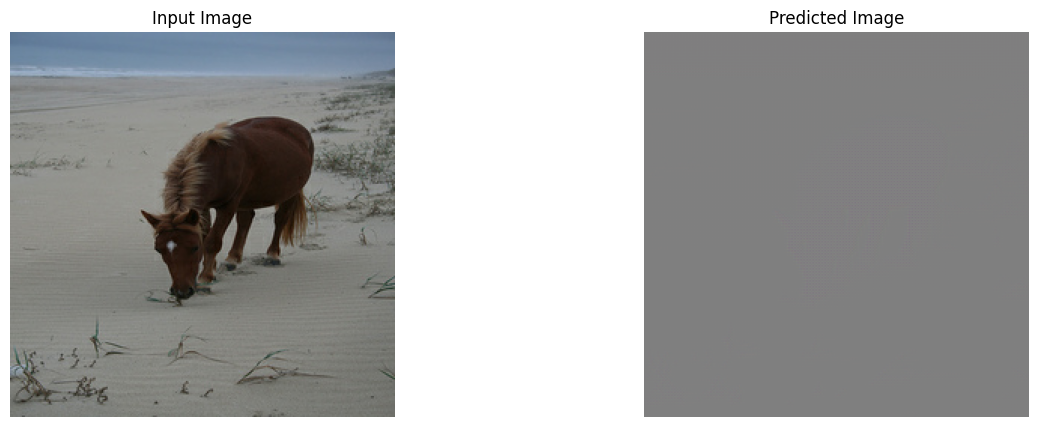

In [12]:
# 1. Get one batch (it's a tuple: input and target)
example_batch = next(iter(train_horses))

# 2. Unpack the tuple
input_images, target_images = example_batch

# 3. Check shape (optional, for debug)
print("Input images shape:", input_images.shape)
print("Target images shape:", target_images.shape)

# 4. Take a single image from input
example_image = input_images[0]  # shape: (256, 256, 3)

# 5. Add batch dimension
example_input = tf.expand_dims(example_image, axis=0)  # shape: (1, 256, 256, 3)

# 6. Pass it to your function
generate_images(generator, example_input)


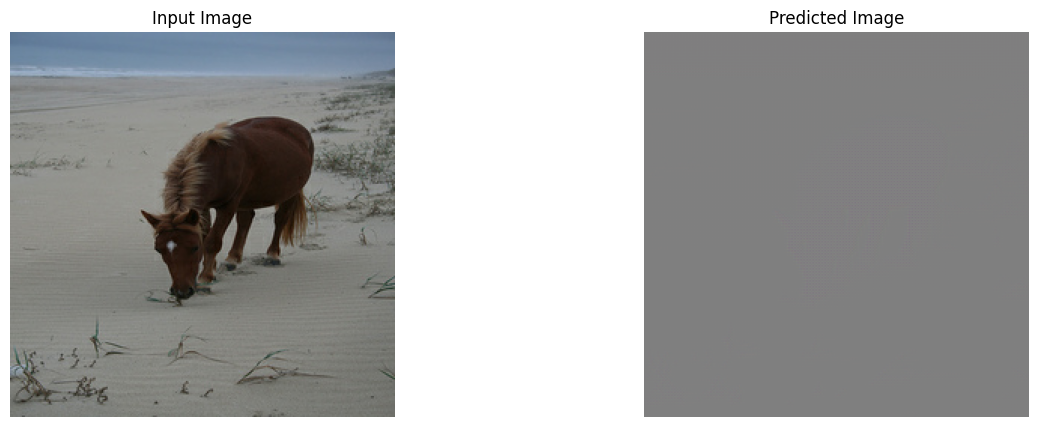

In [13]:
example_image = input_images[0]
example_input = tf.expand_dims(example_image, axis=0)
generate_images(generator, example_input)


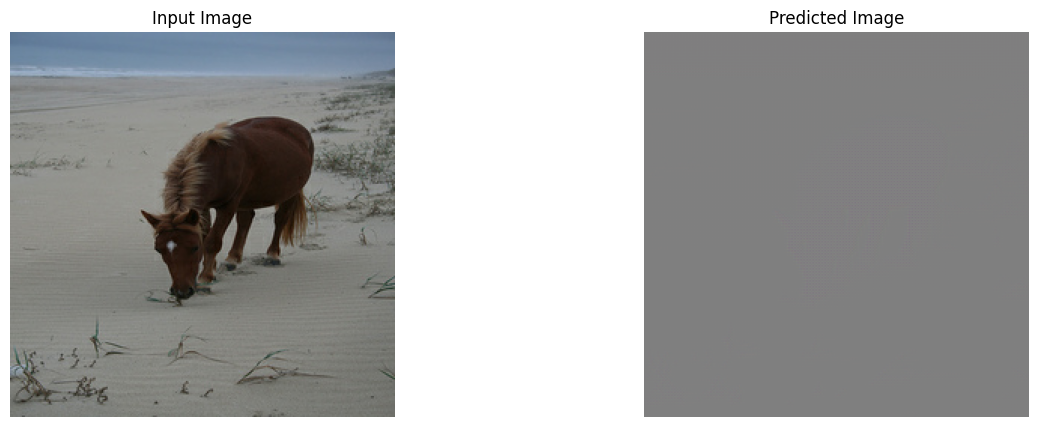

In [14]:
generate_images(generator, example_input)
